In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import scipy.io as spio
import random
import pandas as pd
import seaborn as sns
import numpy as np
import colorsys
import random

# Get N distinguisable colors
def _get_colors(num_colors):
    colors=[]
    for i in np.arange(0., 360., 360. / num_colors):
        hue = i/360.
        lightness = (50 + np.random.rand() * 10)/100.
        saturation = (90 + np.random.rand() * 10)/100.
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors

In [2]:
mainpath = Path('/Users/saadjansari/Documents/Projects/ImageAnalysis/SingleCell/Results/Paper/fig5/monopolar')
mainpath.resolve()
strain_names = ['WT','klp6D', 'alp14D', 'cls1-36']
foldnames = ['wt', 'klp6d', 'alp14d', 'cls1']

df = pd.DataFrame()
df['name'] = strain_names
df['path'] = [ mainpath / relpath for relpath in foldnames]

num_strains = df.shape[0]
cols = _get_colors(num_strains)

In [21]:
all_tau = []
all_times = []

all_lens = []
all_lens_err = []
all_len_mean = []

all_amps = []
all_amps_err = []
all_amps_mean = []
all_amps_std = []

# Loop over each strain
for idx in np.arange(num_strains):
    
    # Find all dydata.mat files
    path_mats = list( df.path[idx].glob('*/dydata.mat') )

    # Initialize lifetimes and lengths arrays
    tau = []
    lens = []
    lens_err = []
    times = []
    amps = []
    amps_err = []
    
    # Loop over all dynamic feature files
    for pth in path_mats:
        # Load mat file
        mat_contents = spio.loadmat(pth, squeeze_me=True)
            
        assert( len(lens) == len(tau) )
        assert( len(lens) == len(lens_err) )
        assert( len(lens) == len(amps) )
        assert( len(lens) == len(amps_err) )
        assert( len(lens) == len(times) )
        
        # Concatenate data
        if type(mat_contents['tau']) == np.ndarray:
            
            for idx in np.arange( len( mat_contents['tau'])):
                tau.append( mat_contents['tau'][idx] )
                lens.append( mat_contents['lens'][idx])
                lens_err.append( mat_contents['lens_err'][idx])
                amps.append( mat_contents['amp'][idx] )
                amps_err.append( mat_contents['amp_err'][idx] )
                times.append( mat_contents['times'][idx] )
        else:
            tau.append( mat_contents['tau'] )
            lens.append( mat_contents['lens'])
            lens_err.append( mat_contents['lens_err'])
            amps.append( mat_contents['amp'] )
            amps_err.append( mat_contents['amp_err'] )
            times.append( mat_contents['times'] )
        
        assert( len(lens) == len(tau) )
        assert( len(lens) == len(lens_err) )
        assert( len(lens) == len(amps) )
        assert( len(lens) == len(amps_err) )
        assert( len(lens) == len(times) )
    all_tau.append(tau)
    all_lens.append(lens)
    all_lens_err.append(lens_err)
    all_times.append(times)
    all_amps.append(amps)
    all_amps_err.append(amps_err)
    all_len_mean.append( [np.mean(i) for i in lens] )
    all_amps_mean.append( [np.mean(i) for i in amps] )
    all_amps_std.append( [np.std(i) for i in amps])

df['lifetime'] = all_tau
df['length'] = all_lens
df['length_err'] = all_lens_err
df['time_vals'] = all_times
df['amplitude'] = all_amps
df['amplitude_err'] = all_amps_err
df['mean_length'] = all_len_mean
df['mean_amp'] = all_amps_mean
df['std_amp'] = all_amps_std

In [22]:
# Remove tracks with lifetime = 2
df['lifetime']

0    [18.200623437500127, 67.60231562500047, 53.301...
1    [64.64997209821516, 10.524414062500142, 12.027...
2    [12.926609375000027, 28.43854062500006, 6.4633...
3    [10.0698859375, 6.293678710937501, 6.293678710...
Name: lifetime, dtype: object

WT:
	Median Lifetime = 13.00 sec
	Mean Lifetime = 21.39 sec
	Median Length = 1.35 micron
	Mean Length = 1.36 micron
klp6D:
	Median Lifetime = 15.77 sec
	Mean Lifetime = 20.85 sec
	Median Length = 1.98 micron
	Mean Length = 2.00 micron
alp14D:
	Median Lifetime = 10.27 sec
	Mean Lifetime = 18.16 sec
	Median Length = 0.94 micron
	Mean Length = 1.08 micron
cls1-36:
	Median Lifetime = 10.21 sec
	Mean Lifetime = 13.11 sec
	Median Length = 1.05 micron
	Mean Length = 1.08 micron


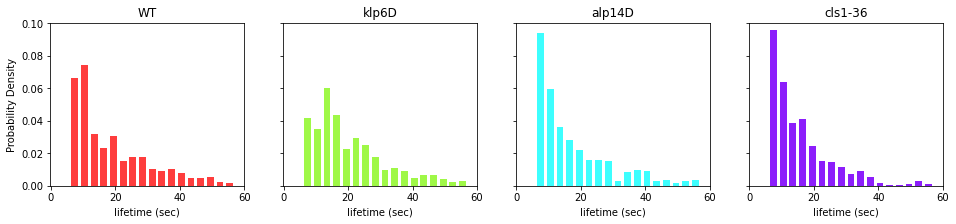

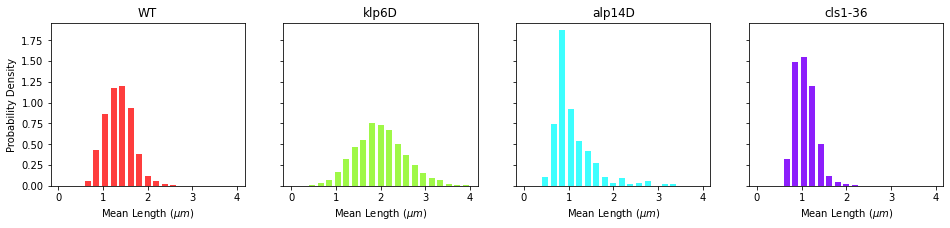

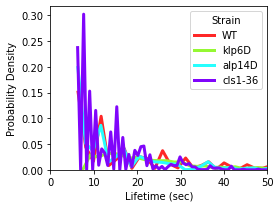

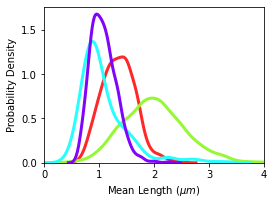

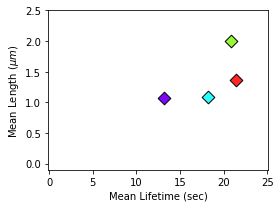

In [8]:
# Plot Histograms

# Plot lifetimes
fig, ax = plt.subplots(1, num_strains, figsize=(4*num_strains,3), sharey=True)
for idx in np.arange(num_strains):
    ax[idx].hist(df.lifetime[idx], bins=np.arange(0,60,3), color=cols[idx],
                                alpha=0.9, rwidth=0.7, density=True)
    ax[idx].set(xlabel='lifetime (sec)', xlim=[-0.1,60.1], title=df.name[idx])
ax[0].set(ylabel='Probability Density')

# Plot lengths
fig, ax = plt.subplots(1, num_strains, figsize=(4*num_strains,3), sharey=True)
for idx in np.arange(num_strains):
    ax[idx].hist(df.mean_length[idx], bins=np.linspace(0,4,22), color=cols[idx],
                            alpha=0.9, rwidth=0.7, density=True)
    ax[idx].set(xlabel=r'Mean Length ($\mu m$)', title=df.name[idx])
ax[0].set(ylabel='Probability Density')

# Plot amplitudes
# fig, ax = plt.subplots(1, num_strains, figsize=(4*num_strains,3))
# for idx in np.arange(num_strains):
#     ax[idx].hist(df.mean_amp[idx], bins=np.linspace(0,0.02,22), color=cols[idx],
#                             alpha=0.9, rwidth=0.7, density=True)
#     ax[idx].set(xlabel=r'Mean Amplitude (a.u)', title=df.name[idx])
# ax[0].set(ylabel='Count')

#plt.savefig('{}/data_{}.pdf'.format(savepath, strain_name))

# Density Plot
#Lifetime
fig, ax = plt.subplots(figsize=(4,3))
# Iterate through the strains
for idx in np.arange(num_strains):
    
    ctau = df.lifetime[idx]
    
    # Draw the density plot
    sns.distplot(ctau, hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3, 'bw':0.01},
                 label = strain_names[idx], color=cols[idx])
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Strain')
plt.xlabel('Lifetime (sec)')
plt.xlim([0,50])
plt.ylabel('Probability Density')
plt.tight_layout()
plt.savefig('/Users/saadjansari/Desktop/strain_lifetime_pdf.pdf')

# Length
fig, ax = plt.subplots(figsize=(4,3))
# Iterate through the strains
for idx in np.arange(num_strains):
    
    clens = df.mean_length[idx]
    
    # Draw the density plot
    sns.distplot(clens, hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 3},
                 color=cols[idx], 
#                  label = strain_names[idx]
                )
    
# Plot formatting
#plt.legend(prop={'size': 10}, title = 'Strain')
plt.xlabel(r'Mean Length ($\mu m$)')
plt.ylabel('Probability Density')
plt.xlim([0,4])
plt.tight_layout()
plt.savefig('/Users/saadjansari/Desktop/strain_length_pdf.pdf')

# Mean Lifetime vs Mean length
print_str = '{0}:\n\tMedian Lifetime = {1:.2f} sec\n\tMean Lifetime = {2:.2f} sec\n\tMedian Length = {3:.2f} micron\n\tMean Length = {4:.2f} micron'
fig, ax = plt.subplots(figsize=(4,3))
for idx in np.arange(num_strains):
        
    ctau = df.lifetime[idx]
    clens = df.mean_length[idx]
    
    # Remove nan values
    arr1 = np.array( ctau)
    arr2 = np.array( clens)
    mask = np.invert( np.isnan( arr1) | np.isnan( arr2))
    arr1 = arr1[mask,]
    arr2 = arr2[mask,]
    print( print_str.format(
        df.name[idx], 
        np.median(arr1),
        np.mean(arr1),
        np.median(arr2),
        np.mean(arr2)) )
    ax.scatter(np.mean(arr1), np.mean(arr2), color=cols[idx],
               s=80, marker="D", edgecolors='k')
ax.set(xlabel='Mean Lifetime (sec)', ylabel=r'Mean Length ($\mu m$)',
       ylim=[-0.1,2.5], xlim=[-0.1, 25.1])  
plt.tight_layout()
plt.savefig('/Users/saadjansari/Desktop/len_vs_lifetime.pdf')

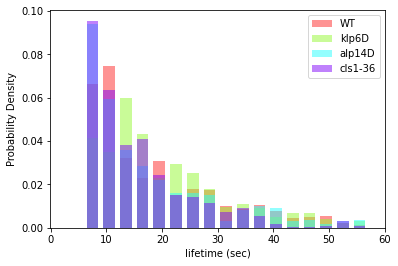

In [40]:
# Stacked Histograms

# Plot lifetimes
fig, ax = plt.subplots()
for idx in np.arange(num_strains):
    ax.hist(df.lifetime[idx], bins=np.arange(0,60,3), color=cols[idx],
                                alpha=0.5, rwidth=0.7, density=True, label=df.name[idx])
ax.set(xlabel='lifetime (sec)', xlim=[-0.1,60.1])
ax.set(ylabel='Probability Density')
plt.legend()

# # Plot lengths
# fig, ax = plt.subplots(1, num_strains, figsize=(4*num_strains,3), sharey=True)
# for idx in np.arange(num_strains):
#     ax[idx].hist(df.mean_length[idx], bins=np.linspace(0,4,22), color=cols[idx],
#                             alpha=0.9, rwidth=0.7, density=True)
#     ax[idx].set(xlabel=r'Mean Length ($\mu m$)', title=df.name[idx])
# ax[0].set(ylabel='Probability Density')

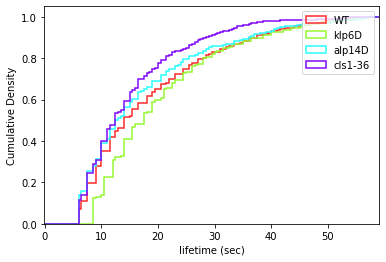

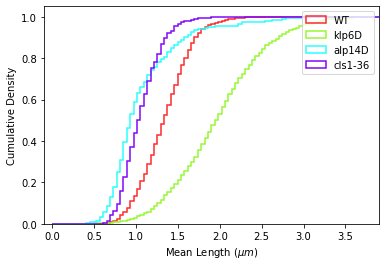

In [35]:
# Cumulative step Histograms

# Plot lifetimes
fig, ax = plt.subplots()
for idx in np.arange(num_strains):
    ax.hist(df.lifetime[idx], bins=np.arange(0,60,0.5), color=cols[idx],
            alpha=1.0, rwidth=0.7, density=True, lw=1.5,
            cumulative=True, histtype='step', label=df.name[idx])
ax.set(xlabel='lifetime (sec)', xlim=[-0.1,59.0])
ax.set(ylabel='Cumulative Density')
ax.legend()

# Plot lengths
fig, ax = plt.subplots()
for idx in np.arange(num_strains):
    ax.hist(df.mean_length[idx], bins=np.linspace(0,4,100), color=cols[idx],
            alpha=1.0, rwidth=0.7, density=True, cumulative=True, lw=1.5, 
            histtype='step', label=df.name[idx])
ax.set(xlabel=r'Mean Length ($\mu m$)', xlim=[-0.1,3.9])
ax.set(ylabel='Cumulative Density')
ax.legend()

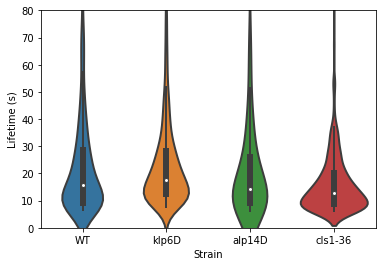

In [35]:
fig,ax = plt.subplots()
ax = sns.violinplot(data=df.lifetime, linewidth=2, saturation=0.7)
ax.set(
    xlabel='Strain', 
    ylabel='Lifetime (s)',
    ylim=[0,80])

plt.xticks(plt.xticks()[0], strain_names)
#plt.tight_layout()
plt.savefig('/Users/saadjansari/Desktop/strain_vs_lifetime.pdf')

([<matplotlib.axis.XTick at 0x132ce37d0>,
 [Text(0, 0, 'WT'),
  Text(1, 0, 'klp6D'),
  Text(2, 0, 'alp14D'),
  Text(3, 0, 'cls1-36')])

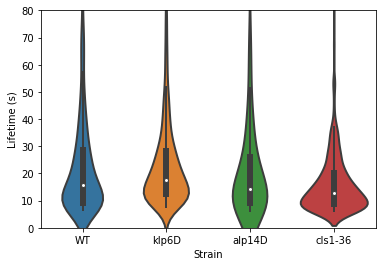

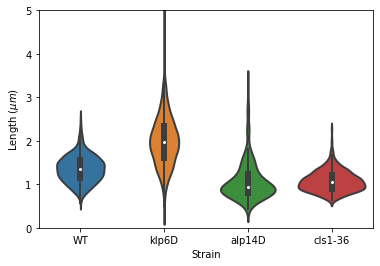

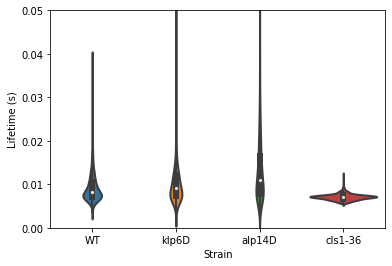

In [49]:
# Plot Violinplots

# Plot lifetimes
fig,ax = plt.subplots()
ax = sns.violinplot(data=df.lifetime, linewidth=2, saturation=0.7)
ax.set(
    xlabel='Strain', 
    ylabel='Lifetime (s)',
    ylim=[0,80])

plt.xticks(plt.xticks()[0], strain_names)
plt.savefig('/Users/saadjansari/Desktop/strain_vs_lifetime.pdf')

# Plot lengths
fig,ax = plt.subplots()
ax = sns.violinplot(data=df.mean_length, linewidth=2, saturation=0.7)
ax.set(
    xlabel='Strain', 
    ylabel=r'Length ($\mu m$)',
    ylim=[0,5])

plt.xticks(plt.xticks()[0], strain_names)
plt.savefig('/Users/saadjansari/Desktop/strain_vs_length.pdf')

# Plot amplitudes
fig,ax = plt.subplots()
ax = sns.violinplot(data=df.mean_amp, linewidth=2, saturation=0.7)
ax.set(
    xlabel='Strain', 
    ylabel='Lifetime (s)',
    ylim=[0,0.05])

plt.xticks(plt.xticks()[0], strain_names)
#plt.tight_layout()
#plt.savefig('/Users/saadjansari/Desktop/strain_vs_amplitude.pdf')


[Text(0, 0.5, 'Length ($/mum$)')]

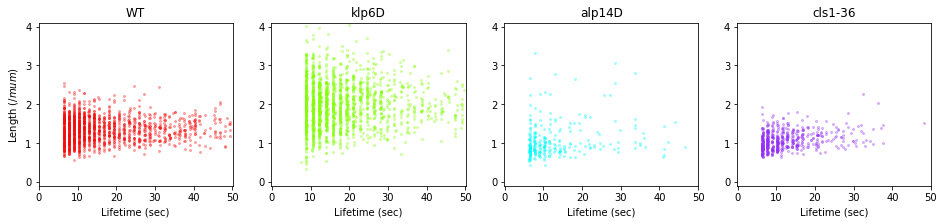

In [5]:
# Plot Lifetime vs mean length
fig, ax = plt.subplots(1, num_strains, figsize=(4*num_strains,3))
for idx in np.arange(num_strains):
    
    # Remove nan values
    arr1 = np.array( df.lifetime[idx])
    arr2 = np.array( df.mean_length[idx])
    mask = np.invert( np.isnan( arr1) | np.isnan( arr2))
    arr1 = arr1[mask,]
    arr2 = arr2[mask,]

    ax[idx].scatter(arr1, arr2, color=cols[idx],
                                alpha=0.3, s=4)
    ax[idx].set(xlabel='Lifetime (sec)', ylim=[-0.1,4.1], xlim=[-0.1, 50.1], title=df.name[idx])
    
ax[0].set(ylabel=r'Length ($/mum$)')

#plt.savefig('{}/data_{}.pdf'.format(savepath, strain_name))

[Text(0, 0.5, 'Length ($/mum$)')]

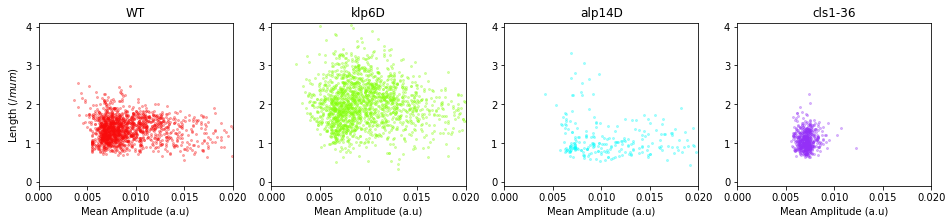

In [6]:
# Plot Amplitude vs mean length
fig, ax = plt.subplots(1, num_strains, figsize=(4*num_strains,3))
for idx in np.arange(num_strains):
    
    # Remove nan values
    arr1 = np.array( df.mean_amp[idx])
    arr2 = np.array( df.mean_length[idx])
    mask = np.invert( np.isnan( arr1) | np.isnan( arr2))
    arr1 = arr1[mask,]
    arr2 = arr2[mask,]

    ax[idx].scatter(arr1, arr2, color=cols[idx],
                                alpha=0.3, s=4)
    ax[idx].set(xlabel='Mean Amplitude (a.u)', ylim=[-0.1,4.1], xlim=[0, 0.02], title=df.name[idx])
    
ax[0].set(ylabel=r'Length ($/mum$)')

#plt.savefig('{}/data_{}.pdf'.format(savepath, strain_name))

[Text(0, 0.5, 'Mean Amplitude')]

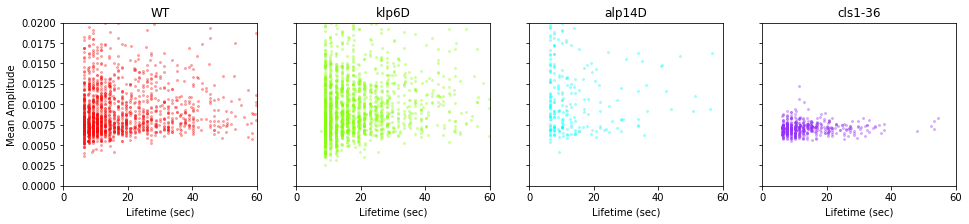

In [7]:
# Plot Amplitude vs Lifetime
fig, ax = plt.subplots(1, num_strains, figsize=(4*num_strains,3), sharey=True)
for idx in np.arange(num_strains):
    
    # Remove nan values
    arr1 = np.array( df.lifetime[idx])
    arr2 = np.array( df.mean_amp[idx])
    mask = np.invert( np.isnan( arr1) | np.isnan( arr2))
    arr1 = arr1[mask,]
    arr2 = arr2[mask,]

    ax[idx].scatter(arr1, arr2, color=cols[idx],
                                alpha=0.3, s=4)
    ax[idx].set(xlabel='Lifetime (sec)', ylim=[0,0.02], xlim=[-0.1, 60.1], title=df.name[idx])
    
ax[0].set(ylabel='Mean Amplitude')

#plt.savefig('{}/data_{}.pdf'.format(savepath, strain_name))

[(0.0, 0.02), Text(0, 0.5, 'Median Amplitude (s)')]

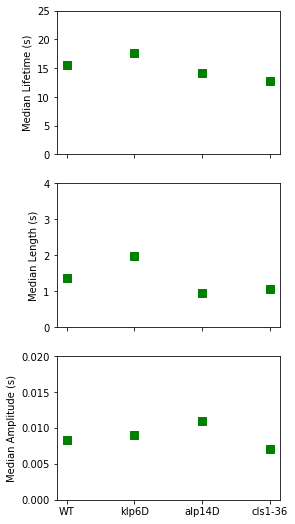

In [9]:
# Parsed data

m_lifetime = []
m_length = []
m_amplitude = []

fig,ax = plt.subplots(3,1, figsize=(4,9), sharex=True)

for idx in np.arange(num_strains):
    
    # Lifetime
    a1 = np.array( df.lifetime[idx] )
    mask = np.invert( np.isnan( a1))
    m_lifetime.append( np.median( a1[mask,]) )
    
    # Length
    a1 = np.array( df.mean_length[idx] )
    mask = np.invert( np.isnan( a1))
    m_length.append( np.median( a1[mask,]) )
    
    # Amplitude
    a1 = np.array( df.mean_amp[idx] )
    mask = np.invert( np.isnan( a1))
    m_amplitude.append( np.median( a1[mask,]) )
    
ax[0].plot( df.name.tolist(), m_lifetime, color='g', marker='s', ms=8, linestyle='')
ax[0].set(ylim=[0,25], ylabel='Median Lifetime (s)')

ax[1].plot( df.name.tolist(), m_length, color='g', marker='s', ms=8, linestyle='')
ax[1].set(ylim=[0,4], ylabel='Median Length (s)')

ax[2].plot( df.name.tolist(), m_amplitude, color='g', marker='s', ms=8, linestyle='')
ax[2].set(ylim=[0,0.02], ylabel='Median Amplitude (s)')

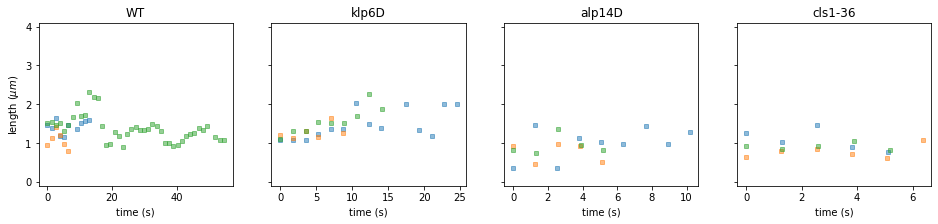

In [63]:
def get_len(v):
    if type(v) == np.ndarray:
        return len(v)
    else:
        return 1
    
fig, ax = plt.subplots(1, num_strains, figsize=(4*num_strains,3), sharey = True)
for idx in np.arange(num_strains):
    lens = sorted( df.length[idx], key=get_len, reverse=True)
    times = sorted( df.time_vals[idx], key=get_len, reverse=True)
    for idx2 in random.sample( range( len(times)), k=3):
        ax[idx].plot( times[idx2]-times[idx2][0], lens[idx2], 
                     ls='', marker='s', ms=4, alpha=0.5)
    ax[idx].set(title=df.name[idx], xlabel = 'time (s)')
ax[0].set(ylabel = r'length ($\mu m$)', ylim=[-0.1,4.1])
plt.savefig('/Users/saadjansari/Desktop/length_vs_time.pdf')

## Amplitude Variations

[Text(0, 0.5, 'Amplitude ($a.u$)'), (-0.001, 0.04)]

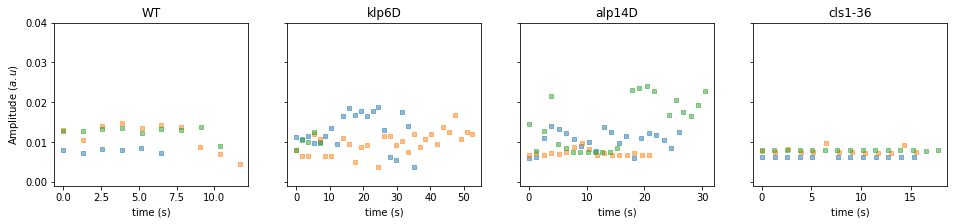

In [13]:
# Plot a few example amplitude plots
def get_amp(v):
    if type(v) == np.ndarray:
        return len(v)
    else:
        return 1
    
fig, ax = plt.subplots(1, num_strains, figsize=(4*num_strains,3), sharey = True)
for idx in np.arange(num_strains):
    amps = sorted( df.amplitude[idx], key=get_amp, reverse=True)
    times = sorted( df.time_vals[idx], key=get_amp, reverse=True)
    for idx2 in random.sample( range( len(times)), k=3):
        ax[idx].plot( times[idx2]-times[idx2][0], amps[idx2], 
                     ls='', marker='s', ms=4, alpha=0.5)
    ax[idx].set(title=df.name[idx], xlabel = 'time (s)')
ax[0].set(ylabel = r'Amplitude ($a.u$)', ylim=[-0.001,0.04])

[Text(0, 0.5, 'Count')]

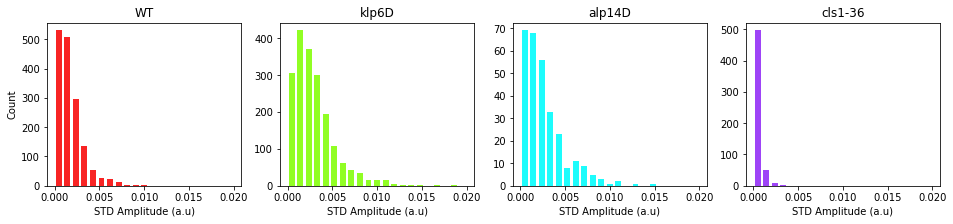

In [16]:
# Standard deviation of amplitudes

fig, ax = plt.subplots(1, num_strains, figsize=(4*num_strains,3))
for idx in np.arange(num_strains):
    ax[idx].hist(df.std_amp[idx], bins=np.linspace(0,0.02,22), color=cols[idx],
                            alpha=0.9, rwidth=0.7)
    ax[idx].set(xlabel=r'STD Amplitude (a.u)', title=df.name[idx])
ax[0].set(ylabel='Count')

[Text(0, 0.5, 'Count')]

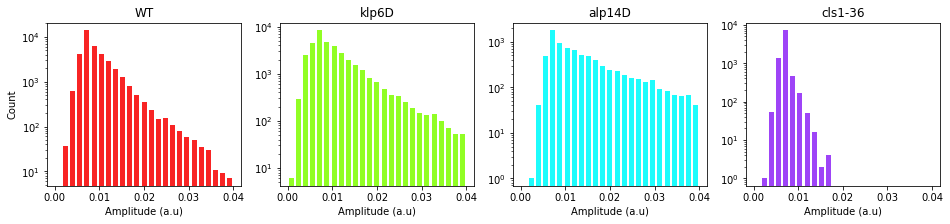

In [56]:
# Use all amplitude counts
def get_amp(v):
    if type(v) == np.ndarray:
        return len(v)
    else:
        return 1
    
fig, ax = plt.subplots(1, num_strains, figsize=(4*num_strains,3))
for idx in np.arange(num_strains):
    
    # get amps
    amps = []
    for idxMT in np.arange( len(df.amplitude[idx]) ):
        if  type( df.amplitude[idx][idxMT] ) == np.ndarray:
            amps = amps + list( df.amplitude[idx][idxMT])
        else:
            amps = amps + [df.amplitude[idx][idxMT]]
            
    ax[idx].hist(amps, bins=np.linspace(0,0.04,26), color=cols[idx],
                            alpha=0.9, rwidth=0.7)
    ax[idx].set(xlabel=r'Amplitude (a.u)', title=df.name[idx])
    ax[idx].set(yscale='log')
ax[0].set(ylabel='Count')

[Text(0, 0.5, 'Amplitude ($a.u$)'), (-0.001, 0.015)]

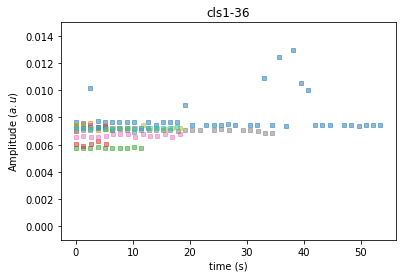

In [57]:
# Plot a few example amplitude plots IN CLS1-36
def get_amp(v):
    if type(v) == np.ndarray:
        return len(v)
    else:
        return 1
    
fig, ax = plt.subplots()
amps = sorted( df.amplitude[3], key=get_amp, reverse=True)
times = sorted( df.time_vals[3], key=get_amp, reverse=True)
for idx2 in random.sample( range( len(times)), k=10):
    ax.plot( times[idx2]-times[idx2][0], amps[idx2], 
                 ls='', marker='s', ms=4, alpha=0.5)
ax.set(title=df.name[3], xlabel = 'time (s)')
ax.set(ylabel = r'Amplitude ($a.u$)', ylim=[-0.001,0.015])

[Text(0, 0.5, 'Count')]

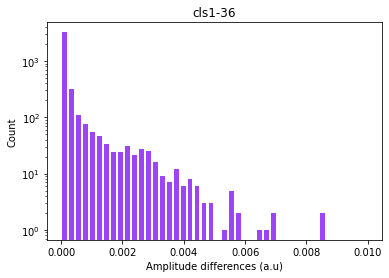

In [59]:
# Plot changes in amplitude for cls1-36
def get_amp(v):
    if type(v) == np.ndarray:
        return len(v)
    else:
        return 1

idx = 3
# get amps and then differences
amps_diff = []
for idxMT in np.arange( len(df.amplitude[idx]) ):
    if type( df.amplitude[idx][idxMT] ) == np.ndarray:
        amps_diff = amps_diff + list( np.ediff1d( df.amplitude[idx][idxMT] ) )

fig, ax = plt.subplots()
ax.hist(amps_diff, bins=np.linspace(0,0.01,45), color=cols[idx],
                        alpha=0.9, rwidth=0.7)
ax.set(xlabel=r'Amplitude differences (a.u)', title=df.name[idx])
ax.set(yscale='log')
ax.set(ylabel='Count')

### Luke: project

Write MT length data to csv for Luke

In [4]:
mt_tracks = df.length[0]
def get_len(v):
    if type(v) == np.ndarray:
        return len(v)
    else:
        return 1
mt_tracks = sorted(mt_tracks, key=get_len, reverse=True)

# Get strings for each MT: this should be a list of strings
mt_strings = [ [str(i) for i in np.around( trk, decimals=5)] for trk in mt_tracks[0:10]]

#Path to save
import csv
spth = '/Users/saadjansari/Desktop/mt_length_data.csv'
with open(spth, 'w', newline='') as csvfile:
    trkwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for trk in mt_strings:
        trkwriter.writerow(trk)

In [5]:
import csv

# Define the path to the data file
# This will be the path specific to your local machine.
spth = '/Users/saadjansari/Desktop/mt_length_data.csv'

# Define an empty list to contain all the different MT length tracks
mt_tracks = []

# Read the file via the csvfile module
with open(spth, newline='') as csvfile:
    trkreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for trk in trkreader:
        
        # Convert the string format to floats
        trk_float = [float(i) for i in trk]
        mt_tracks.append( trk_float)
        
        # Print the first 5 entries of each MT as a sanity check
        print(trk_float[0:5])
        
# mt_tracks is a list of lists. Each list contains datapoints for a single microtubule.

[1.96489, 1.95071, 2.00478, 1.83148, 1.77694]
[1.33583, 1.37534, 1.22418, 1.19091, 1.47592]
[1.06245, 1.10117, 1.39594, 1.15795, 0.9593]
[1.29656, 1.33629, 1.30964, 1.37399, 1.33813]
[1.55315, 1.40058, 1.51966, 1.97418, 1.84804]
[1.39917, 1.54352, 1.57904, 2.0197, 2.17062]
[1.22563, 1.1189, 0.80326, 1.11284, 1.10685]
[1.69617, 1.71768, 1.84842, nan, 1.71986]
[0.95654, 0.96989, 1.2857, 1.19202, 0.88669]
[1.08532, 1.05327, 1.1827, 0.92399, 0.8866]


In [17]:
df.amplitude[0]

[array([0.01029382, 0.01015025, 0.01022397, 0.01054017, 0.0112512 ,
        0.00988894, 0.01157967, 0.01104709, 0.01140275, 0.0092918 ,
        0.0105189 , 0.01283303, 0.01330405, 0.00657042]),
 array([0.00689794, 0.00694964, 0.00688003, 0.00690189, 0.00687166,
        0.00694739, 0.01115623, 0.01369786, 0.00794671,        nan,
        0.0070411 , 0.00688836, 0.00686321, 0.00684633, 0.00744179,
        0.00919306, 0.00749765, 0.00772537, 0.00897069, 0.00786269,
        0.00657895, 0.00743559, 0.00786624, 0.00769992, 0.00786756,
        0.00765128, 0.00758518, 0.00662042, 0.00695347, 0.00708707,
        0.00400379, 0.00512483, 0.00414526, 0.00803372,        nan,
        0.00696347, 0.00769868, 0.01036675, 0.01370128, 0.01241715,
        0.01138725, 0.01307466, 0.01159962, 0.00857339, 0.01050244,
        0.00910253, 0.00877803, 0.00819967, 0.00777262, 0.00997702,
        0.01093678, 0.00879015]),
 array([0.00740722, 0.0109422 , 0.00700689, 0.01112364, 0.01110782,
        0.0102123 , 0.00

In [28]:
len(amps)

9679

In [5]:
pth

PosixPath('/Users/saadjansari/Documents/Projects/ImageAnalysis/SingleCell/Results/Paper/fig5/monopolar2/cls1/210302_2053__890_150msR_trig_5Z_001_1/dydata.mat')

In [4]:
pth

PosixPath('/Users/saadjansari/Documents/Projects/ImageAnalysis/SingleCell/Results/Paper/fig5/monopolar/cls1/210129_2220__890_150msR_trig_5Z_001_3/dydata.mat')

In [10]:
clens

[1.4658899744125595,
 1.006328365492776,
 1.7514631001776337,
 1.2803587465706494,
 1.087948212133377,
 1.3300363851684536,
 1.166082140851002,
 1.1046496391322835,
 0.9283588848480767,
 0.9665855585522715,
 0.7409836178976487,
 nan,
 nan,
 nan,
 nan,
 1.0306648748435496,
 1.071511370987563,
 0.7763409095138672,
 1.0551000027392368,
 0.8627773142211255,
 0.91258987784681,
 1.1963254622727222,
 0.8179084738234337,
 nan,
 nan,
 1.2272873264675432,
 1.2655893335126482,
 1.0077073508676393,
 1.1718293177398555,
 1.0800690907206791,
 0.9352320322467007,
 1.1083814647898913,
 nan,
 0.9406177421895475,
 1.0314358486311013,
 0.8355628083791378,
 nan,
 0.8193752261233043,
 1.0232775701783081,
 nan,
 nan,
 1.0658185728353033,
 0.9432570323245304,
 1.1731195816964615,
 0.9349159833713707,
 1.108719492404858,
 0.8899241703974831,
 1.010400381736789,
 0.8399588365712564,
 0.972718470157178,
 1.13536941745849,
 1.1452977041493952,
 0.7204892377658675,
 nan,
 0.9901764252188352,
 nan,
 0.868922710994